In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from itertools import combinations
import pandas as pd
import numpy as np

In [22]:
# Cargar el CSV generado en el preprocesamiento
df = pd.read_csv("../data/clientes_preprocesado.csv")
df.head()

,Genero,Casado,Edad,Graduado,Experiencia_laboral,Gastoscore,Family_Size,anno_nacimiento,Generacion,Ingresos_anuales_brutos,...,zonas_Sur,ambito_laboral_Finanzas,ambito_laboral_Otros,ambito_laboral_Salud,ambito_laboral_Servicios Publicos,ambito_laboral_Tecnologia/Industria,Campanna_anno_1.0,Campanna_anno_3.0,Campanna_anno_4.0,Campanna_anno_5.0
0,0,1,1.035193,1,0.768272,-0.732743,0.157964,-1.034961,-0.627333,1.046491,...,0,0,0,0,0,1,0,0,0,0
1,1,1,0.871003,1,0.768272,0.624361,-0.488915,-0.870768,-0.627333,1.225402,...,0,0,0,1,0,0,0,0,0,1
2,1,1,0.925733,1,0.768272,0.624361,0.157964,-0.925499,-0.627333,-0.555169,...,0,0,0,0,0,0,0,1,0,0
3,1,0,-0.825626,0,-0.496687,-0.732743,0.804843,0.825894,0.682659,-0.898184,...,0,0,0,0,1,0,0,0,1,0
4,1,1,0.214243,0,0.768272,0.624361,-0.488915,-0.213995,-0.627333,-0.750749,...,0,0,1,0,0,0,0,0,0,0


In [23]:
columnas = []
X = df.copy()

variables_continuas =  ['Edad', 'Experiencia_laboral', 'Gastoscore', 'Family_Size', 'Generacion', 'Ingresos_anuales_brutos', 'Digital_encuesta', 'Gasto_medio_mensual_cuota']
Variables_binarias = [
    'Casado', "Genero", "Abandono"]
X = df[variables_continuas + Variables_binarias]
from sklearn.decomposition import PCA
pca = PCA(n_components=2) # Selección de componentes principales para explicar el 95% de la varianza.
X_pca = pca.fit_transform(X)

print(f"Número de componentes seleccionados para explicar el 95% de la varianza: {pca.n_components_}")

Número de componentes seleccionados para explicar el 95% de la varianza: 2


In [24]:
# Verifica la varianza explicada por cada componente
print("Varianza explicada por cada componente:", pca.explained_variance_ratio_)
print(f"Varianza total explicada: {sum(pca.explained_variance_ratio_)}")


Varianza explicada por cada componente: [0.4115433  0.11972174]
Varianza total explicada: 0.5312650466728404


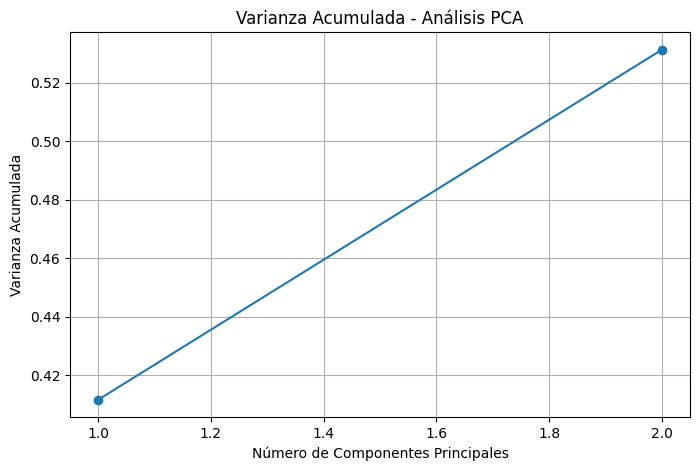

In [25]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(pca.explained_variance_ratio_)+1),
         pca.explained_variance_ratio_.cumsum(), marker='o')
plt.title('Varianza Acumulada - Análisis PCA')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Acumulada')
plt.grid()
plt.show()

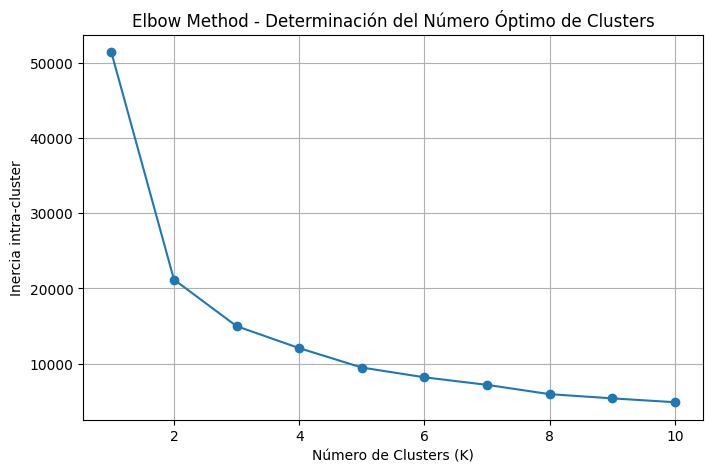

In [26]:
# Evaluación de la inercia para distintos valores de K.
inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca)
    inertia.append(kmeans.inertia_)

# Gráfico del método del codo
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, marker='o')
plt.title('Elbow Method - Determinación del Número Óptimo de Clusters')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Inercia intra-cluster')
plt.grid()
plt.show()

In [27]:
clusters = 5 # Número óptimo de clusters determinado visualmente.
print(f"El número óptimo de clusters es: {clusters}")

El número óptimo de clusters es: 5


In [28]:
kmeans = KMeans(n_clusters=clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_pca)

C:\Users\1cnac\AppData\Local\Temp\ipykernel_30648\1212984213.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Cluster', data=df, palette='viridis')


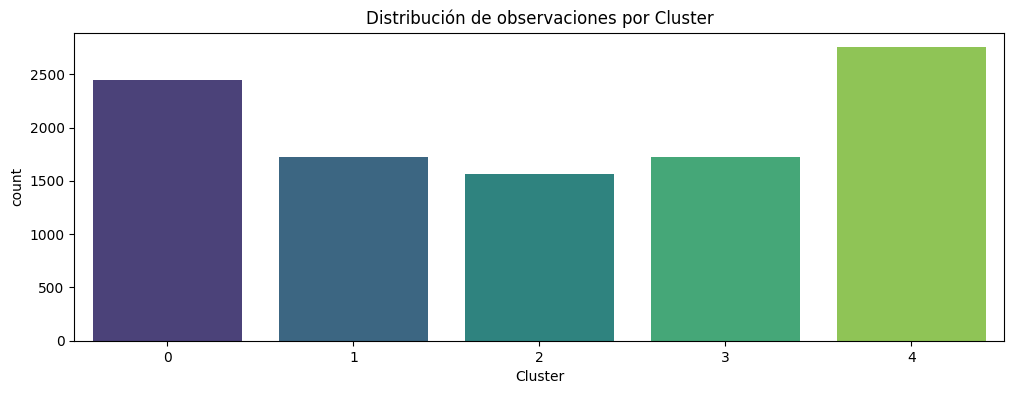

In [29]:
plt.figure(figsize=(12, 4))
sns.countplot(x='Cluster', data=df, palette='viridis')
plt.title('Distribución de observaciones por Cluster')
plt.show()

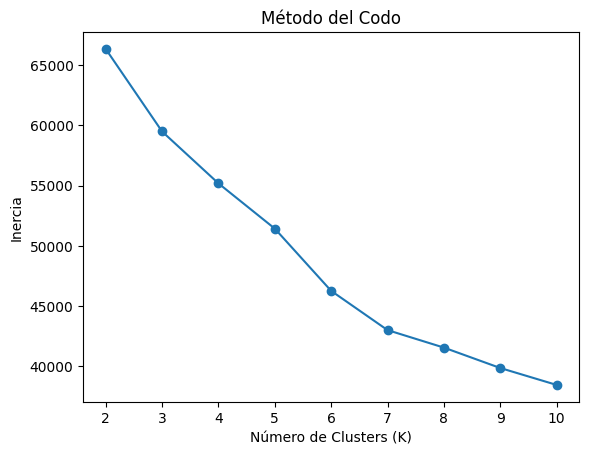

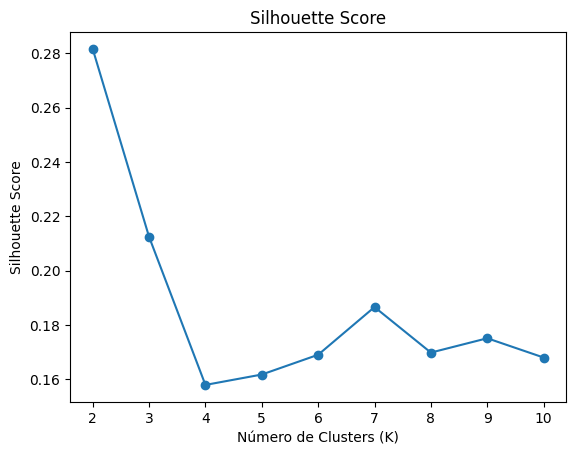

In [30]:
# Método del Codo
inertia = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.plot(range(2, 11), inertia, marker='o')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Inercia')
plt.title('Método del Codo')
plt.show()

# Silhouette Score
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)

plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score')
plt.show()

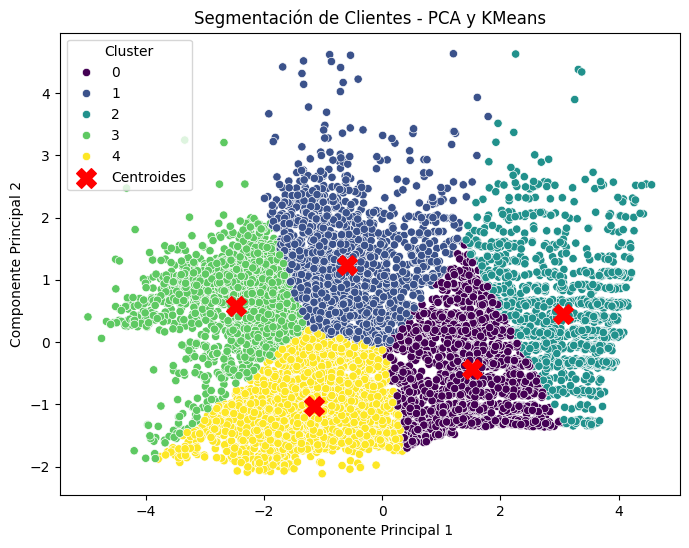

In [31]:
# KMeans clustering
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X_pca)
centroids = kmeans.cluster_centers_

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=clusters, palette='viridis', legend='full')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='X', label='Centroides')
plt.title("Segmentación de Clientes - PCA y KMeans")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.legend(title="Cluster")
plt.show()

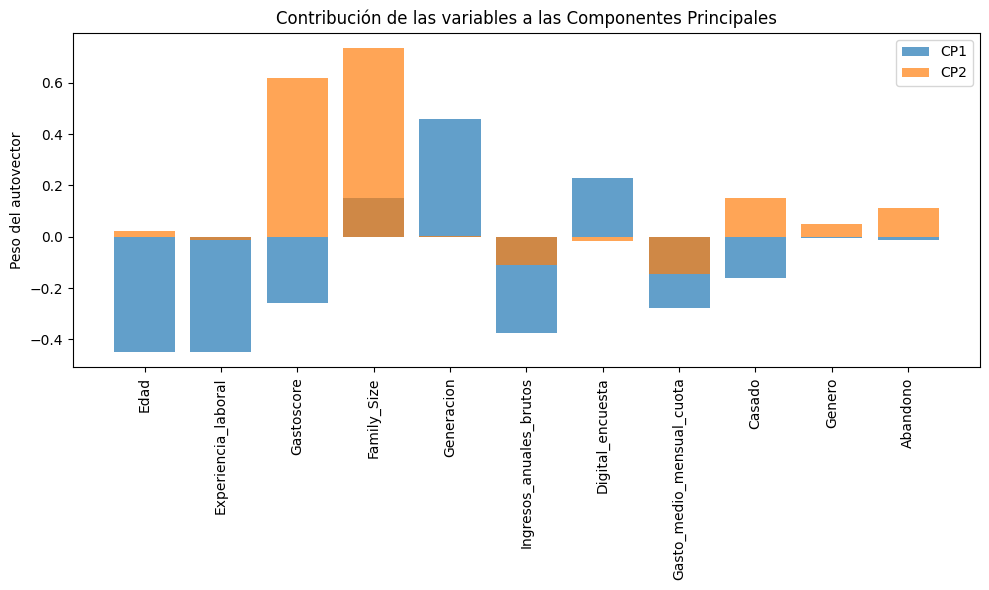

In [32]:
# Gráfico 2: Autovectores (componentes principales)
components = pca.components_
# Obtener los nombres reales de las variables desde X
features = X.columns.tolist()

plt.figure(figsize=(10,6))
plt.bar(range(1, len(components[0])+1), components[0], alpha=0.7, label='CP1')
plt.bar(range(1, len(components[1])+1), components[1], alpha=0.7, label='CP2')
plt.xticks(range(1, len(features)+1), features, rotation=90)
plt.ylabel("Peso del autovector")
plt.title("Contribución de las variables a las Componentes Principales")
plt.legend()
plt.tight_layout()
plt.show()

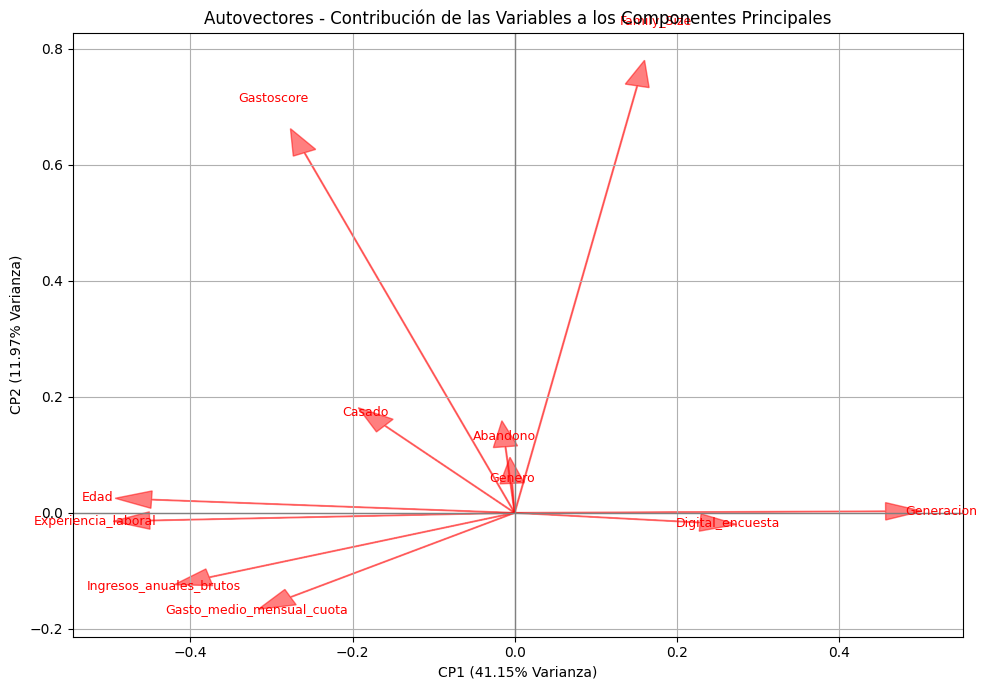

In [33]:
# Autovectores del PCA
components = pca.components_
explained_variance = pca.explained_variance_ratio_ * 100  # porcentaje de varianza explicada

# Usar los nombres reales de las columnas del dataset X
features = np.array(X.columns.tolist())

plt.figure(figsize=(10, 7))
plt.axhline(0, color='gray', lw=1)
plt.axvline(0, color='gray', lw=1)

# Dibujar los vectores (autovectores) con nombres reales
for i in range(len(features)):
    plt.arrow(0, 0, components[0, i], components[1, i],
              color='r', alpha=0.5, head_width=0.03)
    plt.text(components[0, i] * 1.15, components[1, i] * 1.15,
             features[i], color='r', ha='center', va='center', fontsize=9)

plt.xlabel(f"CP1 ({explained_variance[0]:.2f}% Varianza)")
plt.ylabel(f"CP2 ({explained_variance[1]:.2f}% Varianza)")
plt.title("Autovectores - Contribución de las Variables a los Componentes Principales")
plt.grid()
plt.tight_layout()
plt.show()